<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/YB_9_20_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [5]:
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')

### Step 4. See the first 10 entries

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

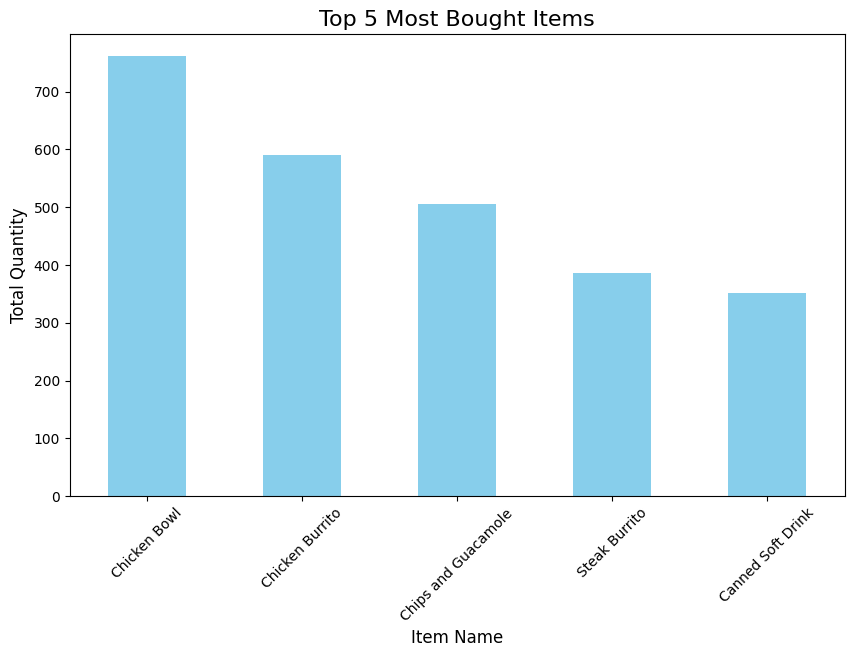

In [7]:
# 각 제품의 구매 횟수 집계
item_counts = chipo.groupby('item_name')['quantity'].sum()

# 상위 5개의 제품 선택
top_5_items = item_counts.nlargest(5)

# 히스토그램 그리기
plt.figure(figsize=(10,6))
top_5_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Bought Items', fontsize=16)
plt.ylabel('Total Quantity', fontsize=12)
plt.xlabel('Item Name', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

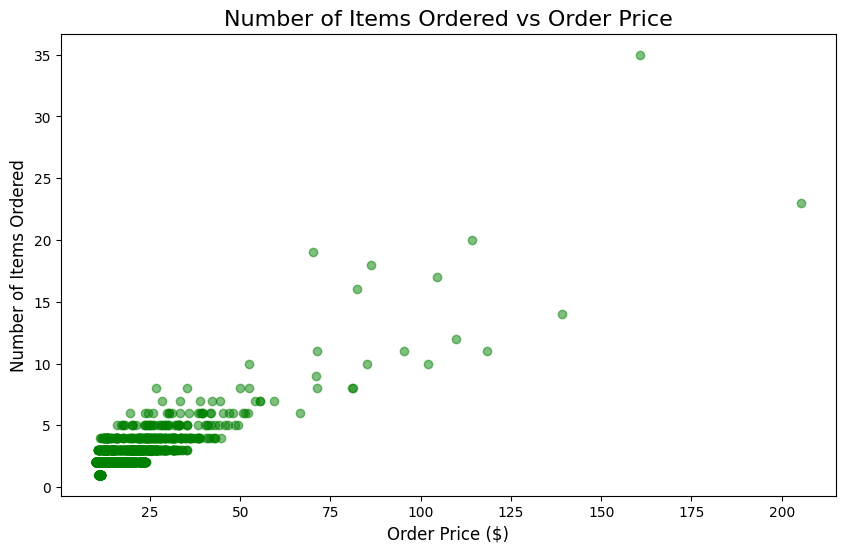

In [8]:
# item_price를 숫자로 변환 (달러 기호 제거)
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# rder_id별로 총 가격과 총 아이템 수량 집계
order_totals = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'}).reset_index()

# 산점도 그리기
plt.figure(figsize=(10,6))
plt.scatter(order_totals['item_price'], order_totals['quantity'], alpha=0.5, color='green')

# 그래프 그리기
plt.title('Number of Items Ordered vs Order Price', fontsize=16)
plt.xlabel('Order Price ($)', fontsize=12)
plt.ylabel('Number of Items Ordered', fontsize=12)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

"어떤 메뉴가 가장 많이 팔렸는가? (각 아이템별 총 판매 수량은 어떻게 되는가?)"

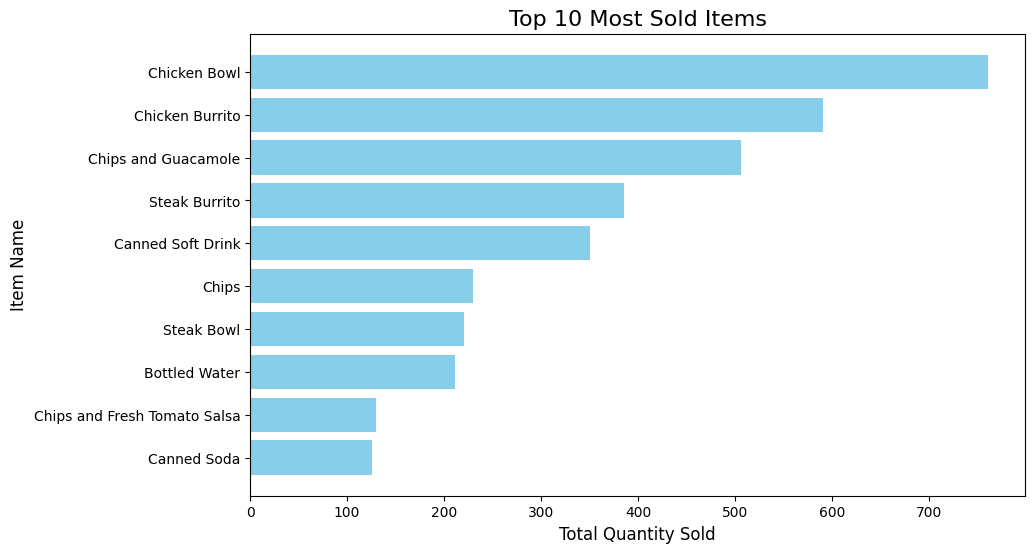

In [11]:
# item_name별로 총 판매 수량 집계
item_sales = chipo.groupby('item_name')['quantity'].sum().reset_index()

# 가장 많이 팔린 상위 10개 아이템 선택
top_10_items = item_sales.sort_values(by='quantity', ascending=False).head(10)

# 막대 그래프 그리기
plt.figure(figsize=(10,6))
plt.barh(top_10_items['item_name'], top_10_items['quantity'], color='skyblue')

# 그래프 꾸미기
plt.title('Top 10 Most Sold Items', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Item Name', fontsize=12)
plt.gca().invert_yaxis()  # 아이템이 위에서부터 순서대로 나오게 하기 위함
plt.show()